In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
df = pd.read_csv("CAR DETAILS.csv")
df.head(5)     # Top 5 rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# Checking the datatypes of the columns
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [4]:
# Checking the shape of the dataset
df.shape

(4340, 8)

In [5]:
# Checking the Column Names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
# Checking the Null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
# Checking the duplicate values (Data Cleaning)
df.duplicated().sum()

763

In [8]:
# Description of the numerical columns
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
# Short Information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [10]:
# print unique values of fuel, seller_type, transmission and owner columns
print('Fuel unique values: ', df['fuel'].unique())
print('\nSeller type unique values: ', df['seller_type'].unique())
print('\nTransmission unique values: ', df['transmission'].unique())
print('\nOwner unique values: ', df['owner'].unique())

Fuel unique values:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

Seller type unique values:  ['Individual' 'Dealer' 'Trustmark Dealer']

Transmission unique values:  ['Manual' 'Automatic']

Owner unique values:  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [11]:
# Unique number of Cars
df['name'].nunique()

1491

In [12]:
# splitting the name column into two columns : car_maker and car_model
name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

In [13]:
# print head after splitting name column
print("Data after splitting car names")
df.head()

Data after splitting car names


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [14]:
# drop name column
df.drop(["name"], inplace = True, axis = 1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [15]:
df["current_year"] = 2023

In [16]:
# create a new column name car_age
df["car_age"] = df["current_year"]-df["year"]
df.drop(["current_year"], axis = 1, inplace = True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,16
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,16
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,11
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,6
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,9


In [17]:
# devided columns into cat_col and num_col
cat_col = df.select_dtypes(include = "object").columns
print("Categorical Columns:",cat_col)
num_col = df.select_dtypes(exclude = "object").columns
print("Numerical Columns:",num_col)

Categorical Columns: Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_maker',
       'car_model'],
      dtype='object')
Numerical Columns: Index(['year', 'selling_price', 'km_driven', 'car_age'], dtype='object')


In [18]:
# Value Counts of Categorical Columns
a2 = df["fuel"].value_counts()
print('Fuel unique values:\n', a2,"\n")

Fuel unique values:
 fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64 



In [19]:
a3 = df["seller_type"].value_counts()
print('Seller type unique values:\n', a3)

Seller type unique values:
 seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [20]:
a4 = df["transmission"].value_counts()
print('Transmission unique values:\n', a4)

Transmission unique values:
 transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [21]:
a5 = df["owner"].value_counts()
print('Owner unique values:\n', a5)

Owner unique values:
 owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [22]:
a6 = df["car_maker"].value_counts()
print('Car Maker unique values:\n', a6)

Car Maker unique values:
 car_maker
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64


In [23]:
a7 = df["car_model"].value_counts()
print('Car Model unique values:\n', a7)

Car Model unique values:
 car_model
Swift        320
Alto         258
Wagon        164
i20          132
Verna        129
            ... 
One            1
NuvoSport      1
S-Presso       1
Yaris          1
Qualis         1
Name: count, Length: 185, dtype: int64


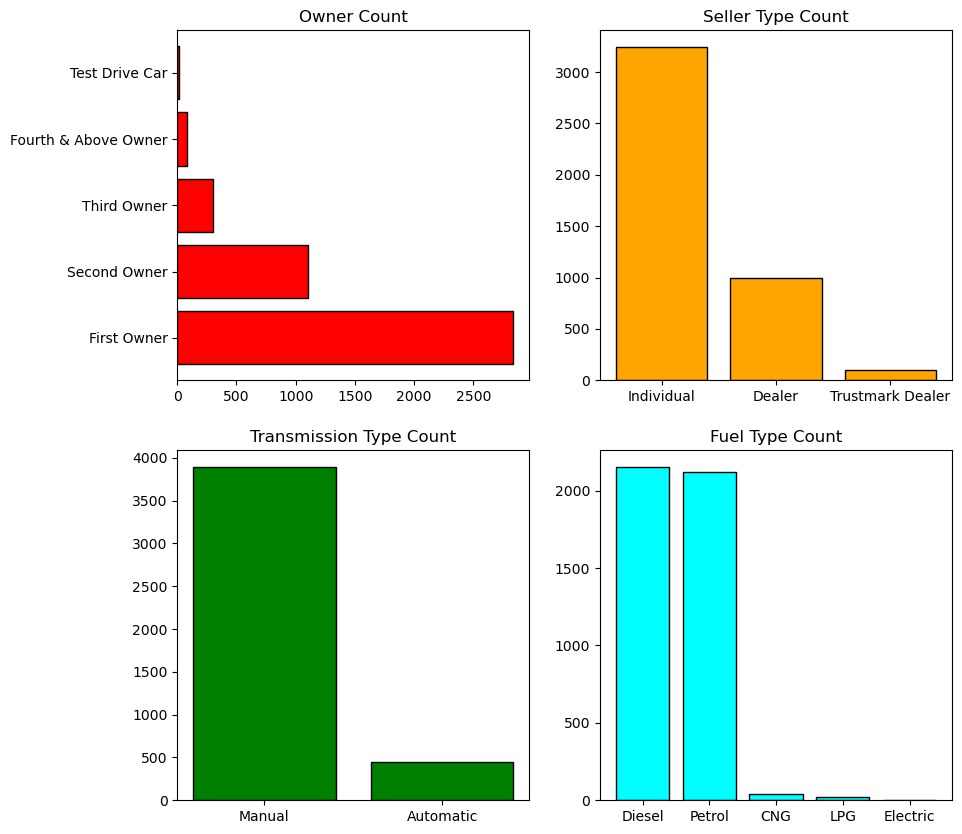

In [24]:
# creating count plot for various cat_cols
figure, axis = plt.subplots(2,2, figsize = (10,10))

axis[0,0].barh(a5.index, a5.values, color = "red", edgecolor = "Black")
axis[0,0].legend
axis[0,0].set_title("Owner Count")

axis[0,1].bar(a3.index, a3.values, color = "orange", edgecolor = "Black")
axis[0,1].legend
axis[0,1].set_title("Seller Type Count")

axis[1,0].bar(a4.index, a4.values, color = "green", edgecolor = "Black")
axis[1,0].legend
axis[1,0].set_title("Transmission Type Count")

axis[1,1].bar(a2.index, a2.values, color = "cyan", edgecolor = "Black")
axis[1,1].legend
axis[1,1].set_title("Fuel Type Count")

plt.show()

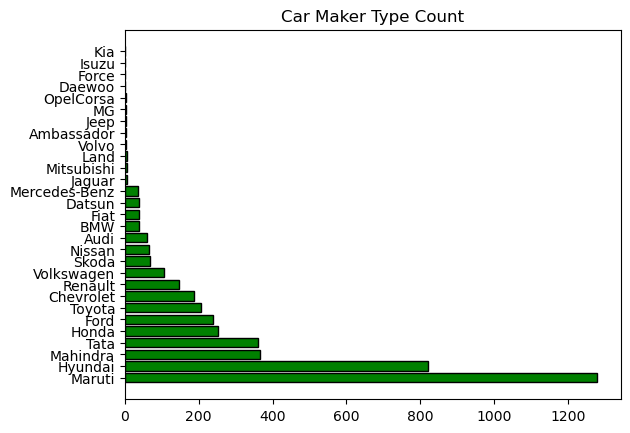

In [25]:
# count plot for car_maker
figure = figsize = (6,6)
plt.barh(a6.index, a6.values, color = "green", edgecolor = "Black")
plt.title("Car Maker Type Count")
plt.show()

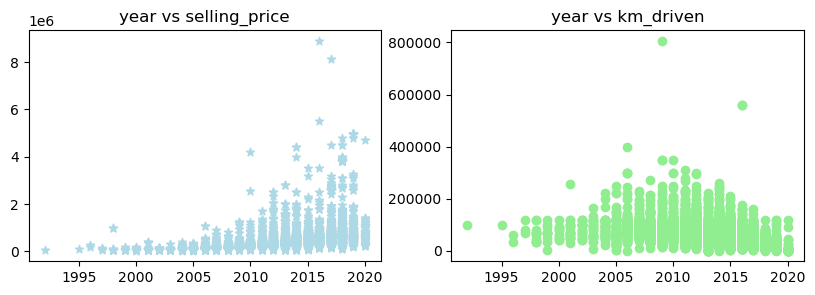

In [26]:
# Scatter plots of numerical columns
figure, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(df.year, df["selling_price"], color = "lightblue", marker = "*")
ax1.set_title("year vs selling_price")

ax2.scatter(df.year, df["km_driven"], color = "lightgreen", marker = "o")
ax2.set_title("year vs km_driven")

plt.show()


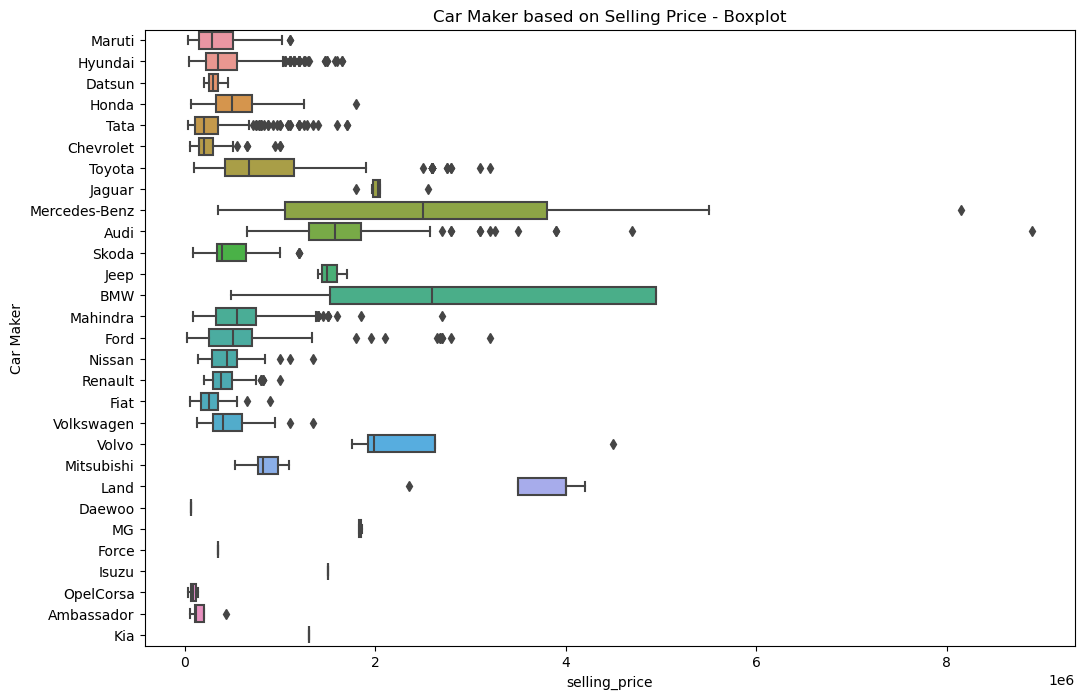

In [27]:
# creating Boxplot for car_maker based on selling_price
plt.figure(figsize = (12,8))
sns.boxplot(y = df["car_maker"], x = df.selling_price)
plt.ylabel("Car Maker")
plt.title("Car Maker based on Selling Price - Boxplot")
plt.show()

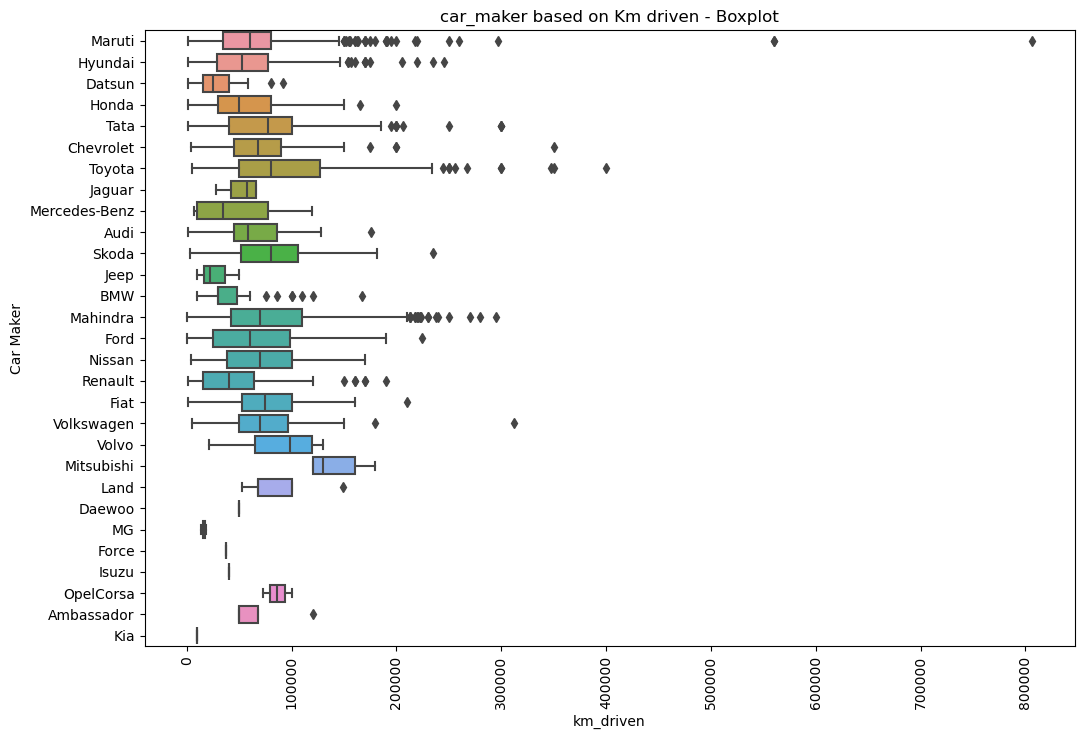

In [28]:
# creating Boxplot for car_maker based on km_driven
plt.figure(figsize = (12,8))
sns.boxplot(x = df.km_driven, y = df["car_maker"])
plt.ylabel("Car Maker")
plt.title("car_maker based on Km driven - Boxplot")
plt.xticks(rotation = 90)
plt.show()

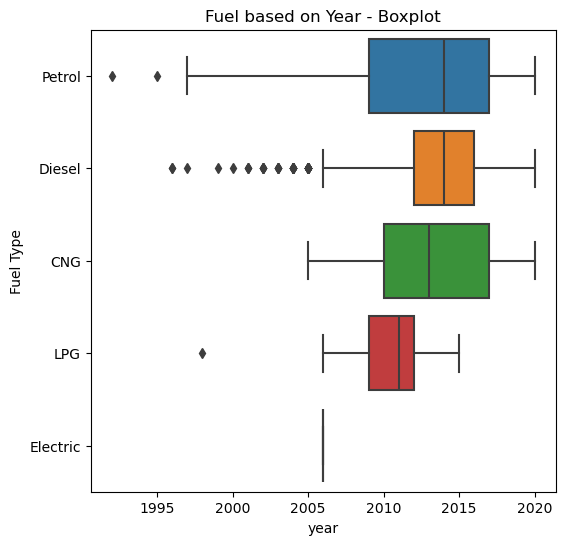

In [29]:
# Boxplot for fuel on year
plt.figure(figsize = (6,6))
sns.boxplot(x = df["year"], y = df.fuel)
plt.ylabel("Fuel Type")
plt.title("Fuel based on Year - Boxplot")
plt.show()

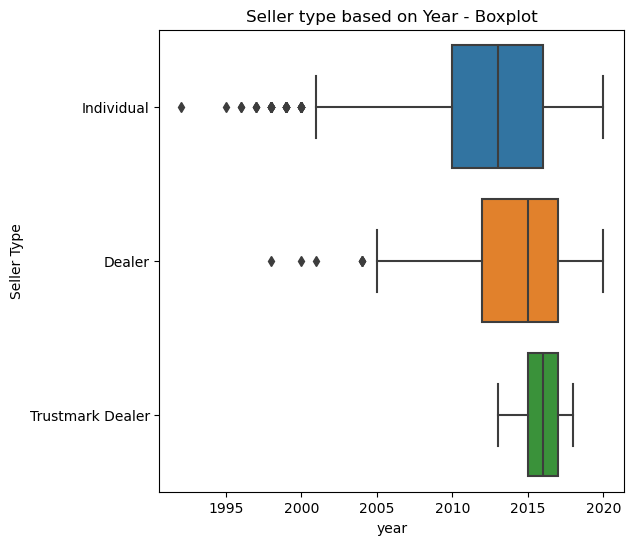

In [30]:
# Boxplot for seller_typr on year
plt.figure(figsize = (6,6))
sns.boxplot(x = df["year"], y = df.seller_type)
plt.ylabel("Seller Type")
plt.title("Seller type based on Year - Boxplot")
plt.show()

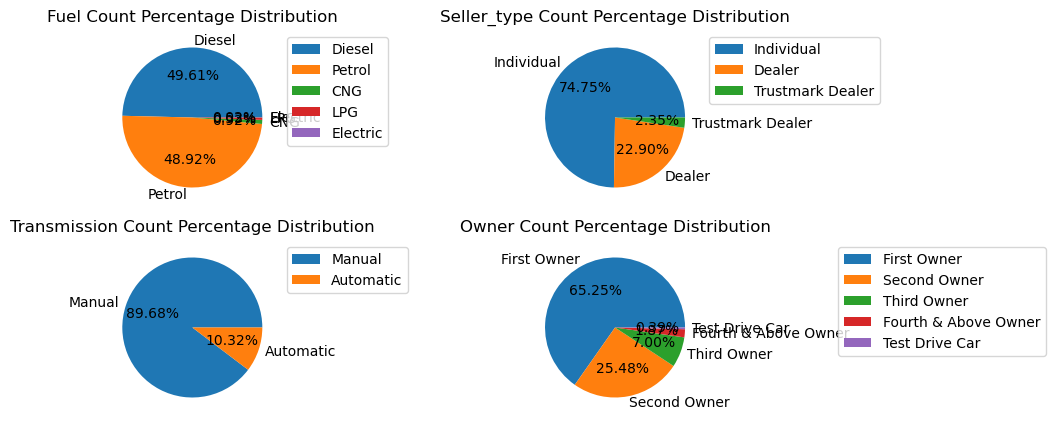

In [31]:
# Checking the categorical column names
cat_col

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,5))

ax1.pie(a2.values, labels = a2.index, autopct = "%.2f%%")
ax1.legend(bbox_to_anchor = (1,1,0.4,0))
ax1.set_title("Fuel Count Percentage Distribution")

ax2.pie(a3.values, labels = a3.index, autopct = "%.2f%%")
ax2.legend(bbox_to_anchor = (1,1,0.4,0))
ax2.set_title("Seller_type Count Percentage Distribution")

ax3.pie(a4.values, labels = a4.index, autopct = "%.2f%%")
ax3.legend(bbox_to_anchor = (1,1,0.4,0))
ax3.set_title("Transmission Count Percentage Distribution")

ax4.pie(a5.values, labels = a5.index, autopct = "%.2f%%")
ax4.legend(bbox_to_anchor = (1,1,2,0))
ax4.set_title("Owner Count Percentage Distribution")

plt.show()

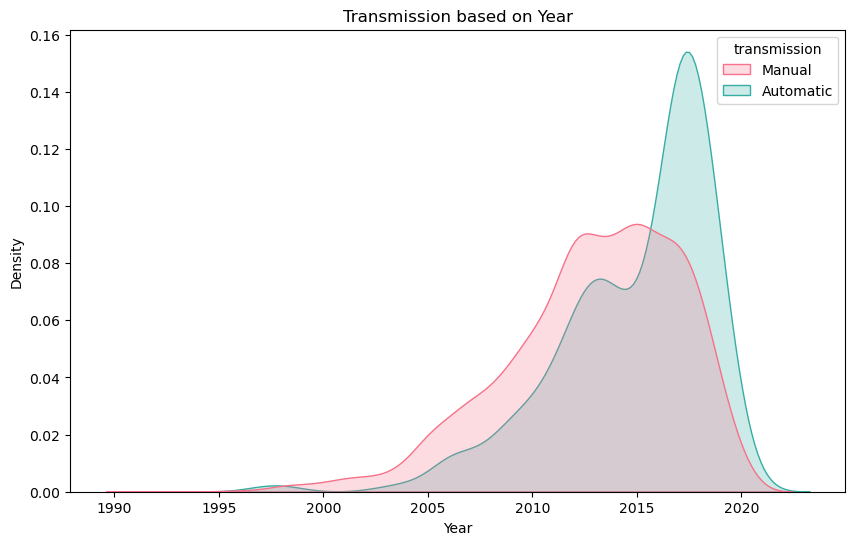

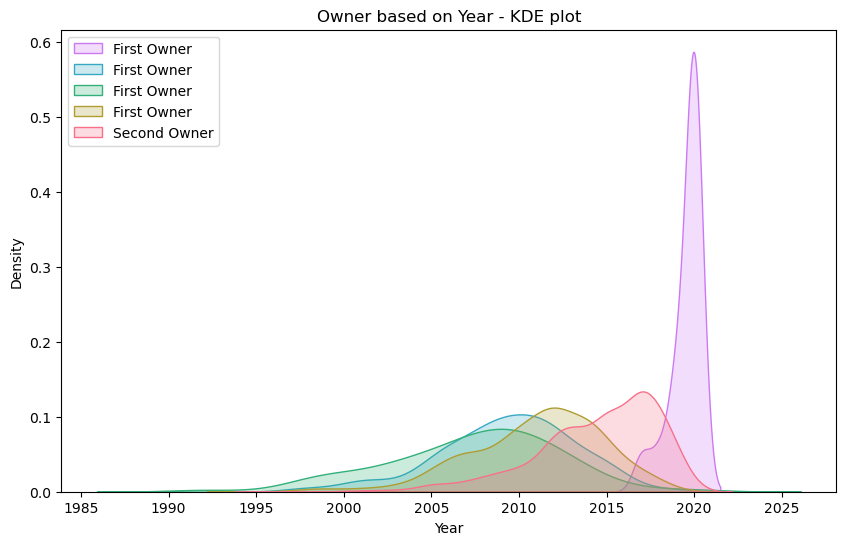

In [32]:
# Convert "year" column to numeric data type
df['year'] = pd.to_numeric(df['year'])

# KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="year", hue="transmission", fill=True, common_norm=False, palette="husl")
plt.xlabel("Year")
plt.ylabel("Density")
plt.title("Transmission based on Year")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="year", hue="owner", fill=True, common_norm=False, palette="husl")
plt.xlabel("Year")
plt.ylabel("Density")
plt.title("Owner based on Year - KDE plot")
plt.legend(labels=df["owner"], loc='upper left')
plt.show()


In [ ]:
# Pair plots of Numerical Columns
sns.pairplot(data = df, vars = ['year', 'selling_price', 'km_driven', "car_age"])
plt.show()